In [9]:
# Option A: change working directory to repo root (one level up)
import os
print("Old CWD:", os.getcwd())
os.chdir(os.path.join(os.getcwd(), ".."))   # go one folder up
print("New CWD:", os.getcwd())
print("Files now visible:", sorted(os.listdir()))

Old CWD: /Users/hollyculhane/Library/CloudStorage/OneDrive-Nexus365/Coding/b1-coding-practical-mt24
New CWD: /Users/hollyculhane/Library/CloudStorage/OneDrive-Nexus365/Coding
Files now visible: ['.DS_Store', 'B1', 'b1-coding-practical-mt24']


In [10]:

# Import essential libraries
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting

# Set up autoreload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing Mission Data Loading
Let's test loading the mission data from CSV and visualize the cave boundaries and reference trajectory.

In [11]:
# Import the Mission class and numpy for array operations
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission, Trajectory
from uuv_mission.control import PDController

# quick print to confirm
print("Submarine, ClosedLoop, Mission, PDController imported")
import numpy as np

# Load the mission data from CSV
try:
    mission = Mission.from_csv('data/mission.csv')
    print("Successfully loaded mission data!")
    print(f"Number of waypoints: {len(mission.reference)}")
    print("\nFirst few points:")
    print(f"Reference depths: {mission.reference[:5]}")
    print(f"Cave heights: {mission.cave_height[:5]}")
    print(f"Cave depths: {mission.cave_depth[:5]}")
except Exception as e:
    print(f"Error loading mission: {e}")

Submarine, ClosedLoop, Mission, PDController imported
Error loading mission: Could not read mission file 'data/mission.csv': [Errno 2] No such file or directory: 'data/mission.csv'


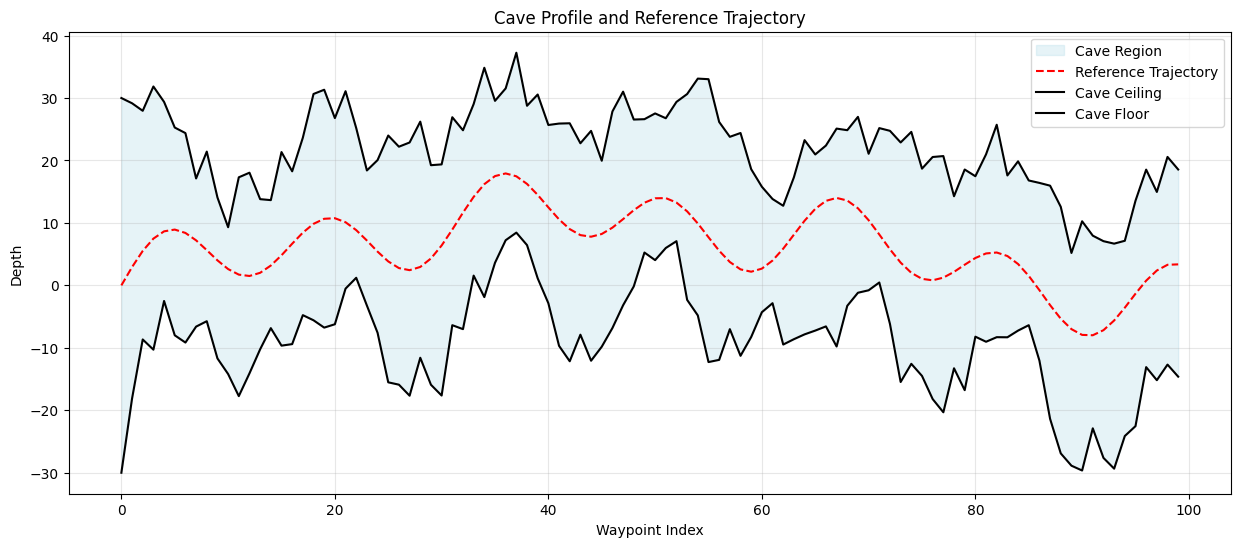

In [12]:
# Visualize the mission data
import matplotlib.pyplot as plt

# Create the x-axis points (one for each waypoint)
x_points = np.arange(len(mission.reference))

# Create the visualization
plt.figure(figsize=(15, 6))
plt.fill_between(x_points, mission.cave_height, mission.cave_depth, 
                 color='lightblue', alpha=0.3, label='Cave Region')
plt.plot(x_points, mission.reference, 'r--', label='Reference Trajectory')
plt.plot(x_points, mission.cave_height, 'k-', label='Cave Ceiling')
plt.plot(x_points, mission.cave_depth, 'k-', label='Cave Floor')

plt.title('Cave Profile and Reference Trajectory')
plt.xlabel('Waypoint Index')
plt.ylabel('Depth')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [13]:
# Additional useful libraries
import pandas as pd  # for data manipulation and analysis
import scipy as sp  # for scientific computing
import plotly.express as px  # for interactive plots
import plotly.graph_objects as go  # for custom interactive plots

# Enable Plotly in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [14]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/hollyculhane/Library/CloudStorage/OneDrive-Nexus365/Coding/b1-coding-practical-mt24/.venv/lib/python3.9/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

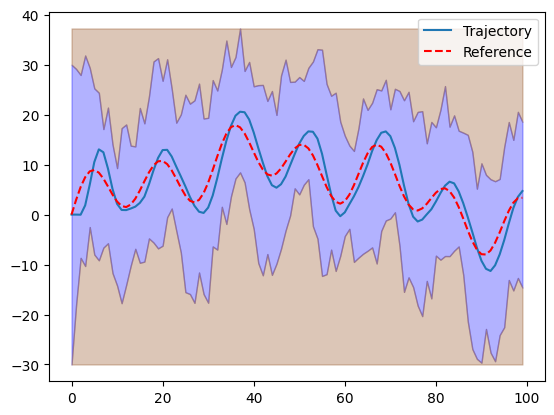

In [18]:

# Import relevant modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

# 1️⃣  Create the submarine (the plant)
sub = Submarine()

# 2️⃣  Create your PD controller
controller = PDController(KP=0.15, KD=0.6)  # gains from coursework brief

# 3️⃣  Create the closed-loop system
closed_loop = ClosedLoop(sub, controller)

# 4️⃣  Load the mission data
# 🔸 Replace with the actual path to your CSV (e.g., "data/mission.csv" or "mission.csv")
mission = Mission.from_csv("/Users/hollyculhane/Library/CloudStorage/OneDrive-Nexus365/Coding/b1-coding-practical-mt24/data/mission.csv")

# 5️⃣  Run the simulation with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.2)

# 6️⃣  Plot the completed mission
trajectory.plot_completed_mission(mission)

In [17]:
# Run this to locate mission.csv anywhere under the repo
import os
root = os.getcwd()   # repo root (or current working dir)
matches = []
for dirpath, dirnames, filenames in os.walk(root):
    for fn in filenames:
        if fn.lower() == "mission.csv":
            matches.append(os.path.join(dirpath, fn))

print("CWD:", root)
if matches:
    print("Found mission.csv at:")
    for m in matches:
        print("  ", m)
else:
    print("No mission.csv found under the current working directory.")
    

CWD: /Users/hollyculhane/Library/CloudStorage/OneDrive-Nexus365/Coding
Found mission.csv at:
   /Users/hollyculhane/Library/CloudStorage/OneDrive-Nexus365/Coding/b1-coding-practical-mt24/data/mission.csv
